# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

/Users/edwizzle/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.1595,  0.72  ,  0.7185,  0.1728,  0.6245,  0.0523,  0.5051,  0.4677,  0.4821,  0.4246,
        0.7075,  0.4409,  0.7627,  0.5699,  0.8157,  0.3099,  0.3445,  0.8701,  0.8662,  0.2537,
        0.4664,  0.7574,  0.4014,  0.8949,  0.154 ,  0.0255,  0.18  ,  0.7221,  0.966 ,  0.6092])

In [6]:
y

array([  8.4786,  10.1601,  10.1554,   8.5185,   9.8734,   8.1568,   9.5153,   9.4032,   9.4462,
         9.2739,  10.1225,   9.3227,  10.2882,   9.7097,  10.447 ,   8.9296,   9.0336,  10.6103,
        10.5985,   8.761 ,   9.3991,  10.2722,   9.2042,  10.6848,   8.462 ,   8.0765,   8.5401,
        10.1664,  10.898 ,   9.8276])

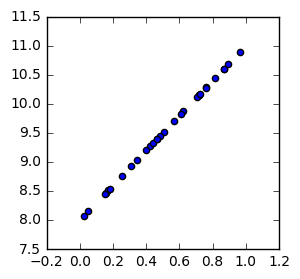

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1212

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani

KeyError: u'ffmpeg'